In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data preprocessing

In [32]:
df = pd.read_csv("./placement.csv")

In [33]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:xlabel='cgpa', ylabel='placement_exam_marks'>

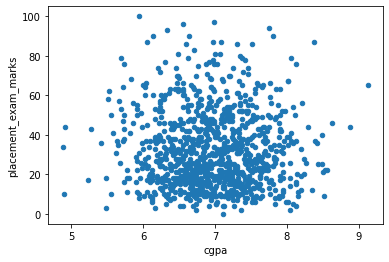

In [34]:
df.plot.scatter(x="cgpa", y="placement_exam_marks")

In [35]:
df.sort_values(by="placement_exam_marks", ascending=False)

,cgpa,placement_exam_marks,placed
917,5.95,100.0,0
846,6.99,97.0,0
630,6.56,96.0,1
9,7.75,94.0,1
134,6.33,93.0,0
...,...,...,...
74,6.16,3.0,1
701,6.74,2.0,1
863,8.04,2.0,1
943,7.36,2.0,0


In [36]:
df.drop(columns=["placed"], inplace=True)

In [37]:
df.head()

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0


## Spliting data

In [38]:
train = df.sample(frac=0.7, random_state=1)

In [39]:
test = df.drop(train.index)

# Linear Regression
- Using formula

$$c\  (intercept) = \cfrac{(\Sigma y)(\Sigma x^2) - (\Sigma x)(\Sigma xy)}{n(\Sigma x^2) - (\Sigma x)^2}$$

$$m \ \ (slope) = \cfrac{n(\Sigma xy) - (\Sigma x)(\Sigma y)}{n(\Sigma x^2) - (\Sigma x)^2}$$

In [40]:
# Here x is CGPA and y is LPA
X = train.cgpa.to_numpy()
Y = train.placement_exam_marks.to_numpy()

In [58]:
intercept = (np.sum(Y)*np.sum(X**2) - np.sum(X)*np.sum(X*Y))/(len(X)*np.sum(X**2) - (np.sum(X))**2)

In [59]:
slope = (len(X)*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(len(X)*np.sum(X**2) - (np.sum(X))**2)

In [60]:
print(f"{slope} x + {intercept} = y")

-1.5084801735559032 x + 42.770412022137315 = y


In [44]:
test["pred"] = test.cgpa * c + m

In [45]:
test.head()

,cgpa,placement_exam_marks,pred
7,7.12,39.0,32.030033
10,6.82,16.0,32.482577
15,7.10,21.0,32.060203
20,6.69,47.0,32.678680
21,7.43,33.0,31.562404


In [46]:
test["err"] = test.pred - test.placement_exam_marks

In [47]:
test.head()

,cgpa,placement_exam_marks,pred,err
7,7.12,39.0,32.030033,-6.969967
10,6.82,16.0,32.482577,16.482577
15,7.10,21.0,32.060203,11.060203
20,6.69,47.0,32.678680,-14.321320
21,7.43,33.0,31.562404,-1.437596


In [48]:
test.err.mean()*100

14.839832924188471

In [49]:
np.sqrt(np.mean((test.err.to_numpy())**2))*100

1861.1787555098076

<AxesSubplot:xlabel='cgpa', ylabel='placement_exam_marks'>

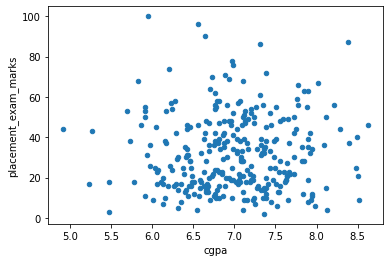

In [50]:
test.plot.scatter(x="cgpa", y="placement_exam_marks")

<AxesSubplot:xlabel='cgpa', ylabel='pred'>

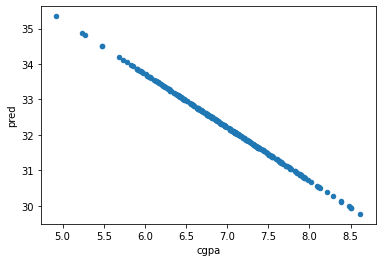

In [51]:
test.plot.scatter(x="cgpa", y="pred")

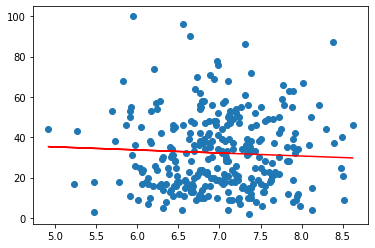

In [56]:
plt.scatter(test.cgpa, test.placement_exam_marks)
plt.plot(test.cgpa, test.pred, color="r")